In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import seaborn as sns




In [113]:
hit = pd.read_csv("Hitters.csv")
df =hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
x = pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [93]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [94]:
x_train = pd.DataFrame(x_train.iloc[:,1:2]).values
x_test = pd.DataFrame(x_test.iloc[:,1:2]).values

In [95]:
x_train

array([[ 91.],
       [144.],
       [152.],
       [ 49.],
       [ 95.],
       [144.],
       [ 40.],
       [ 71.],
       [112.],
       [174.],
       [171.],
       [152.],
       [157.],
       [118.],
       [159.],
       [123.],
       [141.],
       [ 39.],
       [  4.],
       [ 93.],
       [163.],
       [ 96.],
       [103.],
       [ 81.],
       [ 54.],
       [106.],
       [110.],
       [ 76.],
       [ 86.],
       [ 39.],
       [ 37.],
       [119.],
       [147.],
       [ 56.],
       [ 66.],
       [ 82.],
       [ 85.],
       [171.],
       [103.],
       [ 54.],
       [ 41.],
       [ 60.],
       [ 57.],
       [ 49.],
       [ 58.],
       [160.],
       [144.],
       [117.],
       [ 73.],
       [ 42.],
       [ 84.],
       [152.],
       [138.],
       [142.],
       [132.],
       [135.],
       [ 78.],
       [149.],
       [ 86.],
       [151.],
       [119.],
       [102.],
       [ 82.],
       [122.],
       [108.],
       [172.],
       [ 6

In [96]:
svr_model = SVR(kernel="linear").fit(x_train,y_train)

In [97]:
svr_pred = svr_model.predict(x_train)

In [98]:
svr_pred

array([ 403.52804878,  666.91219512,  706.66829268,  194.80853659,
        423.40609756,  666.91219512,  150.08292683,  304.13780488,
        507.88780488,  815.99756098,  801.08902439,  706.66829268,
        731.51585366,  537.70487805,  741.45487805,  562.55243902,
        652.00365854,  145.11341463,  -28.8195122 ,  413.46707317,
        761.33292683,  428.37560976,  463.16219512,  353.83292683,
        219.65609756,  478.07073171,  497.94878049,  328.98536585,
        378.6804878 ,  145.11341463,  135.17439024,  542.67439024,
        681.82073171,  229.59512195,  279.2902439 ,  358.80243902,
        373.71097561,  801.08902439,  463.16219512,  219.65609756,
        155.05243902,  249.47317073,  234.56463415,  194.80853659,
        239.53414634,  746.42439024,  666.91219512,  532.73536585,
        314.07682927,  160.02195122,  368.74146341,  706.66829268,
        637.09512195,  656.97317073,  607.27804878,  622.18658537,
        338.92439024,  691.7597561 ,  378.6804878 ,  701.69878

In [99]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],
                              svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [100]:
x_train

array([[ 91.],
       [144.],
       [152.],
       [ 49.],
       [ 95.],
       [144.],
       [ 40.],
       [ 71.],
       [112.],
       [174.],
       [171.],
       [152.],
       [157.],
       [118.],
       [159.],
       [123.],
       [141.],
       [ 39.],
       [  4.],
       [ 93.],
       [163.],
       [ 96.],
       [103.],
       [ 81.],
       [ 54.],
       [106.],
       [110.],
       [ 76.],
       [ 86.],
       [ 39.],
       [ 37.],
       [119.],
       [147.],
       [ 56.],
       [ 66.],
       [ 82.],
       [ 85.],
       [171.],
       [103.],
       [ 54.],
       [ 41.],
       [ 60.],
       [ 57.],
       [ 49.],
       [ 58.],
       [160.],
       [144.],
       [117.],
       [ 73.],
       [ 42.],
       [ 84.],
       [152.],
       [138.],
       [142.],
       [132.],
       [135.],
       [ 78.],
       [149.],
       [ 86.],
       [151.],
       [119.],
       [102.],
       [ 82.],
       [122.],
       [108.],
       [172.],
       [ 6

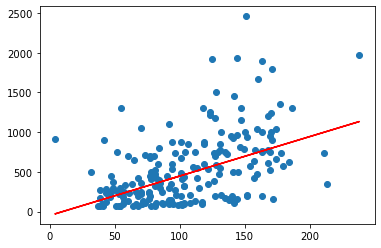

In [101]:
y_pred = svr_model.predict(x_train)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred,color = "r")

In [102]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(x_train,y_train)
lm_pred = lm_model.predict(x_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))


y = -8.814095480334572 + 5.1724561354706875 x


Text(0, 0.5, 'Maaş')

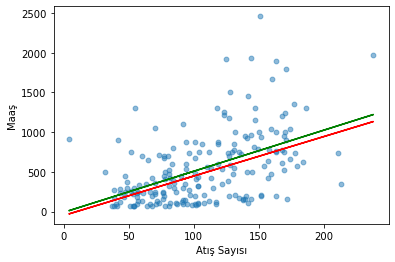

In [103]:
plt.scatter(x_train,y_train,alpha=0.5,s=23)
plt.plot(x_train,lm_pred,"g")
plt.plot(x_train,y_pred,color = "r")

plt.xlabel("Atış Sayısı")
plt.ylabel("Maaş")

# Tahmin

In [104]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],
                              svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [105]:
svr_model.predict([[91]])

array([403.52804878])

In [106]:
y_pred = svr_model.predict(x_test)

In [107]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.0187960365147

# Model Tuning

In [114]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=10).fit(x_train,y_train)

In [115]:
svr_cv_model.best_params_

{'C': 0.4}

In [116]:
svr_tuned = SVR(kernel="linear",C =pd.Series(svr_cv_model.best_params_)).fit(x_train,y_train)

In [117]:
y_pred = svr_tuned.predict(x_test)

In [112]:
np.sqrt(mean_squared_error(y_test,y_pred))

458.198966781116

In [118]:
np.sqrt(mean_squared_error(y_test,y_pred))

367.538528365296